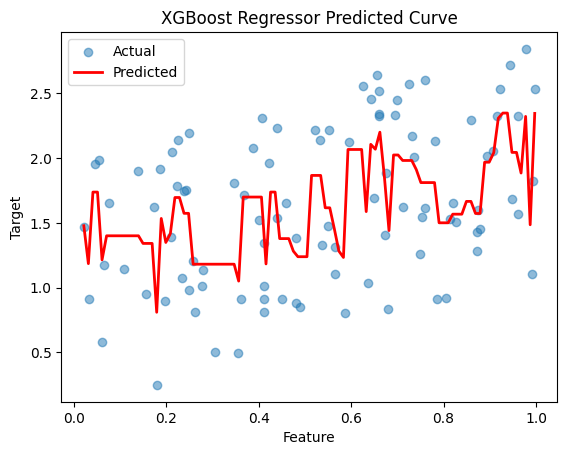

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

class XGBoostRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.models = []

    def fit(self, X, y):
        F = np.zeros(len(y))

        for _ in range(self.n_estimators):
            gradient = y - F
            model = DecisionTreeRegressor(max_depth=2)
            model.fit(X.reshape(-1, 1), gradient)
            prediction = model.predict(X.reshape(-1, 1))
            F += self.learning_rate * prediction
            self.models.append(model)

    def predict(self, X):
        F = np.zeros(len(X))

        for model in self.models:
            prediction = model.predict(X.reshape(-1, 1))
            F += self.learning_rate * prediction

        return F

# Example usage
X_train = np.random.rand(100)
y_train = X_train + 2 * np.random.rand(100)  # Simulated data
xgb_regressor = XGBoostRegressor(n_estimators=100, learning_rate=0.1)
xgb_regressor.fit(X_train, y_train)
y_pred = xgb_regressor.predict(X_train)

# Scatter plot of training data
plt.scatter(X_train, y_train, label='Actual', alpha=0.5)

# Plot the predicted curve
x_range = np.linspace(min(X_train), max(X_train), 100)
y_range = xgb_regressor.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_range, color='red', label='Predicted', linewidth=2)

plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('XGBoost Regressor Predicted Curve')
plt.legend()
plt.show()
